In [69]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import matplotlib.pyplot as plt
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [70]:
df= pd.read_csv("../../data/temperature.csv")
df

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542
3,108,서울,2022-01-04,-2.5,-5.6,2400.0,1.0,1445
4,108,서울,2022-01-05,-2.8,-7.8,634.0,1.9,1518
...,...,...,...,...,...,...,...,...
360,108,서울,2022-12-27,-2.6,-7.3,720.0,3.3,1515
361,108,서울,2022-12-28,-3.3,-6.0,2355.0,0.1,1453
362,108,서울,2022-12-29,-2.9,-7.8,728.0,2.1,1522
363,108,서울,2022-12-30,-1.8,-4.4,2355.0,2.3,1354


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       364 non-null    float64
 5   최저기온 시각(hhmi)  364 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


In [72]:
# 결측치 행번호 구하기 (결과는 리스트로 저장된다)

missing_indices = df[df.isna().any(axis=1)].index.tolist()
missing_indices

[219]

In [73]:
df[217:222]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
217,108,서울,2022-08-06,28.7,27.4,454.0,30.3,1718
218,108,서울,2022-08-07,28.9,27.2,354.0,31.7,1421
219,108,서울,2022-08-08,26.8,NaN,NaN,28.4,1
220,108,서울,2022-08-09,25.1,22.0,2354.0,26.5,1538
221,108,서울,2022-08-10,24.7,21.4,455.0,28.8,1503


In [74]:
## 이전 행의 값으로 결측값을 채움 (forward fill)

df2 = df.fillna(method='ffill')

## df.fillna(method='bfill')  다음(아래) 행의 값으로 채움

In [75]:
df2[217:222]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
217,108,서울,2022-08-06,28.7,27.4,454.0,30.3,1718
218,108,서울,2022-08-07,28.9,27.2,354.0,31.7,1421
219,108,서울,2022-08-08,26.8,27.2,354.0,28.4,1
220,108,서울,2022-08-09,25.1,22.0,2354.0,26.5,1538
221,108,서울,2022-08-10,24.7,21.4,455.0,28.8,1503


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


In [77]:
# 파일로 내보내기

df2.to_csv('../../data/temperature2.csv')

In [78]:
df2.rename(columns={'최저기온(°C)':'min_temp'}, inplace=True)
df2.rename(columns={'평균기온(°C)':'avg_temp'}, inplace=True)
df2.rename(columns={'최고기온(°C)':'max_temp'}, inplace=True)
df2.head(3)

,지점,지점명,일시,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
0,108,서울,2022-01-01,-4.3,-10.2,710.0,2.3,1544
1,108,서울,2022-01-02,-1.3,-5.2,2356.0,3.0,1551
2,108,서울,2022-01-03,-1.9,-8.0,714.0,2.5,1542


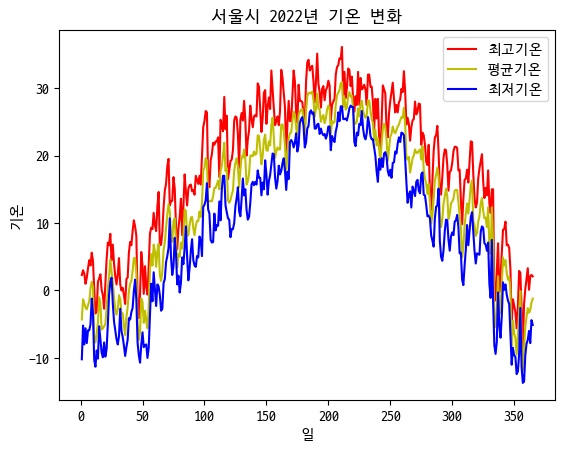

In [79]:
plt.title('서울시 2022년 기온 변화')
plt.plot(range(1,len(df2)+1), df2['max_temp'], label='최고기온', c='r')
plt.plot(range(1,len(df2)+1), df2['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,len(df2)+1), df2['min_temp'], label='최저기온', c='b')
plt.xlabel('일')
plt.ylabel('기온')
plt.legend()
plt.show()

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   avg_temp       365 non-null    float64
 4   min_temp       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    float64
 6   max_temp       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


In [81]:
df2['일시'] = pd.to_datetime(df2['일시'], format='%Y-%m-%d')
df2['일시']

0     2022-01-01
1     2022-01-02
2     2022-01-03
3     2022-01-04
4     2022-01-05
         ...    
360   2022-12-27
361   2022-12-28
362   2022-12-29
363   2022-12-30
364   2022-12-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [82]:
df3_mar = df2[df2['일시'].dt.month==3]
df3_mar

,지점,지점명,일시,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
59,108,서울,2022-03-01,5.8,0.3,2355.0,9.7,1616
60,108,서울,2022-03-02,3.5,-2.3,611.0,8.8,1256
61,108,서울,2022-03-03,5.8,0.9,720.0,12.4,1413
62,108,서울,2022-03-04,6.9,0.6,652.0,14.6,1338
63,108,서울,2022-03-05,2.3,-0.7,2341.0,6.7,1600
64,108,서울,2022-03-06,1.4,-3.0,629.0,6.8,1603
65,108,서울,2022-03-07,2.8,-2.7,703.0,8.7,1505
66,108,서울,2022-03-08,6.0,1.1,307.0,12.3,1455
67,108,서울,2022-03-09,7.1,1.7,706.0,14.8,1520
68,108,서울,2022-03-10,9.3,4.2,658.0,15.8,1534


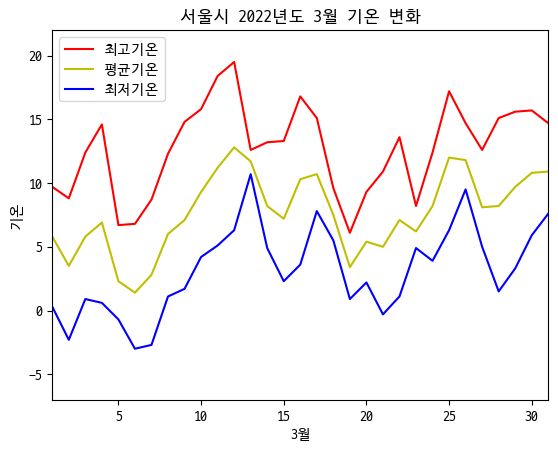

In [83]:
plt.title('서울시 2022년도 3월 기온 변화')
plt.plot(range(1,32), df3_mar['max_temp'], label='최고기온', c='r')
plt.plot(range(1,32), df3_mar['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,32), df3_mar['min_temp'], label='최저기온', c='b')

plt.xlabel('3월')
plt.ylabel('기온')
plt.xlim(1,31)
plt.ylim(-7, 22)
plt.legend()
plt.show()

In [84]:
df4 = df2.set_index('일시')
df4

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2022-01-01,108,서울,-4.3,-10.2,710.0,2.3,1544
2022-01-02,108,서울,-1.3,-5.2,2356.0,3.0,1551
2022-01-03,108,서울,-1.9,-8.0,714.0,2.5,1542
2022-01-04,108,서울,-2.5,-5.6,2400.0,1.0,1445
2022-01-05,108,서울,-2.8,-7.8,634.0,1.9,1518
...,...,...,...,...,...,...,...
2022-12-27,108,서울,-2.6,-7.3,720.0,3.3,1515
2022-12-28,108,서울,-3.3,-6.0,2355.0,0.1,1453
2022-12-29,108,서울,-2.9,-7.8,728.0,2.1,1522


In [85]:
df_month3  = df4[pd.DatetimeIndex(df4.index).month == 3]
df_month4  = df4[pd.DatetimeIndex(df4.index).month == 4]
df_month11 = df4[pd.DatetimeIndex(df4.index).month == 11]
df_month12 = df4[pd.DatetimeIndex(df4.index).month == 12]

In [86]:
df_month4

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2022-04-01,108,서울,9.2,4.5,620.0,14.9,1347
2022-04-02,108,서울,8.2,3.7,618.0,14.2,1444
2022-04-03,108,서울,9.6,3.5,629.0,17.0,1527
2022-04-04,108,서울,10.3,5.1,638.0,16.4,1328
2022-04-05,108,서울,10.3,4.9,615.0,15.8,1409
2022-04-06,108,서울,11.7,8.0,600.0,17.0,1431
2022-04-07,108,서울,10.9,7.4,2359.0,15.7,1310
2022-04-08,108,서울,12.9,5.1,612.0,20.0,1521
2022-04-09,108,서울,17.8,12.4,751.0,24.2,1418


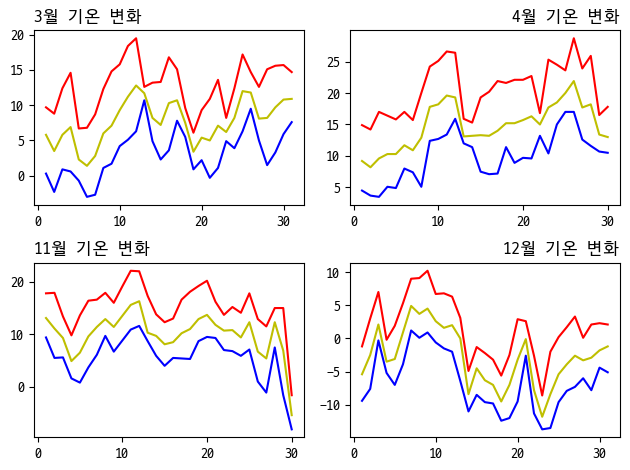

In [87]:
plt.subplot(2,2,1)      # 2행 2열중에서 1번 자리에 그리기
plt.title('3월 기온 변화', loc='left')
plt.plot(range(1,32), df_month3['max_temp'], c='r')
plt.plot(range(1,32), df_month3['avg_temp'], c='y')
plt.plot(range(1,32), df_month3['min_temp'], c='b')

plt.subplot(2,2,2)
plt.title('4월 기온 변화', loc='right')
plt.plot(range(1,31), df_month4['max_temp'], c='r')
plt.plot(range(1,31), df_month4['avg_temp'], c='y')
plt.plot(range(1,31), df_month4['min_temp'], c='b')

plt.subplot(2,2,3)
plt.title('11월 기온 변화', loc='left')
plt.plot(range(1,31), df_month11['max_temp'], c='r')
plt.plot(range(1,31), df_month11['avg_temp'], c='y')
plt.plot(range(1,31), df_month11['min_temp'], c='b')

plt.subplot(2,2,4)
plt.title('12월 기온 변화', loc='right')
plt.plot(range(1,32), df_month12['max_temp'], c='r')
plt.plot(range(1,32), df_month12['avg_temp'], c='y')
plt.plot(range(1,32), df_month12['min_temp'], c='b')

plt.tight_layout()
plt.show()

In [88]:
# 매월 1일 데이터

df_days1 = df4[pd.DatetimeIndex(df4.index).day == 1]
df_days1

,지점,지점명,avg_temp,min_temp,최저기온 시각(hhmi),max_temp,최고기온 시각(hhmi)
일시,,,,,,,
2022-01-01,108,서울,-4.3,-10.2,710.0,2.3,1544
2022-02-01,108,서울,-1.3,-2.7,2345.0,0.9,1601
2022-03-01,108,서울,5.8,0.3,2355.0,9.7,1616
2022-04-01,108,서울,9.2,4.5,620.0,14.9,1347
2022-05-01,108,서울,13.4,7.9,514.0,19.2,1512
2022-06-01,108,서울,22.1,16.2,547.0,28.6,1415
2022-07-01,108,서울,26.6,21.9,1.0,30.9,1536
2022-08-01,108,서울,28.6,25.4,4.0,32.4,1420
2022-09-01,108,서울,24.0,18.3,614.0,30.4,1553


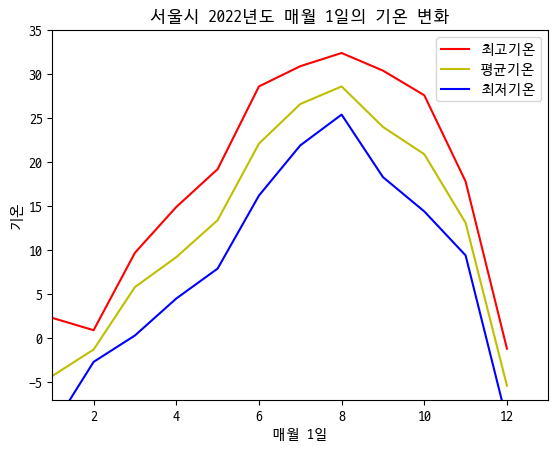

In [89]:
plt.title('서울시 2022년도 매월 1일의 기온 변화')
plt.plot(range(1,13), df_days1['max_temp'], label='최고기온', c='r')
plt.plot(range(1,13), df_days1['avg_temp'], label='평균기온', c='y')
plt.plot(range(1,13), df_days1['min_temp'], label='최저기온', c='b')

plt.xlabel('매월 1일')
plt.ylabel('기온')
plt.xlim(1,13)
plt.ylim(-7, 35)
plt.legend()
plt.show()